<a href="https://colab.research.google.com/github/Sans-codes/2462364_SanskritiAryal/blob/main/Worksheet5_SanskritiAryal_5CS037_ConceptsAndTechnologiesOfAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


To-Do-1: Data Understanding, Analysis and Preparation
Objective

In [18]:
data = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/student.csv")
data.head()
data.tail()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


split into X and Y

In [19]:
X = data[['Math', 'Reading']].values
Y = data['Writing'].values

To-Do-2: Matrix Representation   
In this task, the linear regression model is represented in matrix form without using a bias term.

The feature matrix X contains the Math and Reading scores for each student.
The target vector Y contains the Writing scores.

The relationship between input and output is expressed as:

Y = X · W

Since no bias term is assumed, the prediction depends only on the weighted sum of the features.


In [6]:
# X shape: (n_samples, n_features)
# W shape: (n_features,)
# Y shape: (n_samples,)

To-Do-3: Manual Train–Test Split (80–20)

In [7]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split_index = int(0.8 * len(X))

train_indices = indices[:split_index]
test_indices = indices[split_index:]

X_train = X[train_indices]
Y_train = Y[train_indices]

X_test = X[test_indices]
Y_test = Y[test_indices]


To-Do-4: Cost Function (Mean Squared Error)

In [8]:
def cost_function(X, Y, W):
    Y_pred = np.dot(X, W)
    error = Y_pred - Y
    cost = (1 / (2 * len(Y))) * np.sum(error ** 2)
    return cost

To-Do-5: Cost Function Test Case

In [9]:
X_test_case = np.array([[1, 2], [3, 4], [5, 6]])
Y_test_case = np.array([3, 7, 11])
W_test_case = np.array([1, 1])

cost = cost_function(X_test_case, Y_test_case, W_test_case)

if cost == 0:
    print("Proceed Further")
else:
    print("Something went wrong")

print("Cost:", cost)

Proceed Further
Cost: 0.0


To-Do-6: Gradient Descent from Scratch

In [10]:
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for i in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        dw = (1 / m) * np.dot(X.T, loss)
        W = W - alpha * dw
        cost_history[i] = cost_function(X, Y, W)

    return W, cost_history

To-Do-7: Gradient Descent Test Case

In [11]:
np.random.seed(0)

X_test = np.random.rand(100, 3)
Y_test = np.random.rand(100)
W_test = np.random.rand(3)

alpha = 0.01
iterations = 1000

final_params, cost_history = gradient_descent(X_test, Y_test, W_test, alpha, iterations)

print("Final Parameters:", final_params)
print("Final Cost:", cost_history[-1])

Final Parameters: [0.20551667 0.54295081 0.10388027]
Final Cost: 0.05435492255484332


To-Do-8: RMSE Implementation

In [12]:
def rmse(Y, Y_pred):
    error = Y - Y_pred
    return np.sqrt(np.mean(error ** 2))

To-Do-9: R² (Coefficient of Determination)

In [13]:
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

To-Do-10: Main Function (Complete Pipeline)

In [15]:
def main():
    data = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/student.csv")

    X = data[['Math', 'Reading']].values
    Y = data['Writing'].values

    np.random.seed(42)
    indices = np.random.permutation(len(X))
    split = int(0.8 * len(X))

    X_train = X[indices[:split]]
    Y_train = Y[indices[:split]]
    X_test = X[indices[split:]]
    Y_test = Y[indices[split:]]

    W = np.zeros(X_train.shape[1])
    alpha = 0.00001
    iterations = 1000

    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    Y_pred = np.dot(X_test, W_optimal)

    print("Final Weights:", W_optimal)
    print("RMSE:", rmse(Y_test, Y_pred))
    print("R² Score:", r2(Y_test, Y_pred))

main()

Final Weights: [0.3533225  0.64122757]
RMSE: 5.258385317376058
R² Score: 0.8688492410749991


Cost vs Iterations Plot

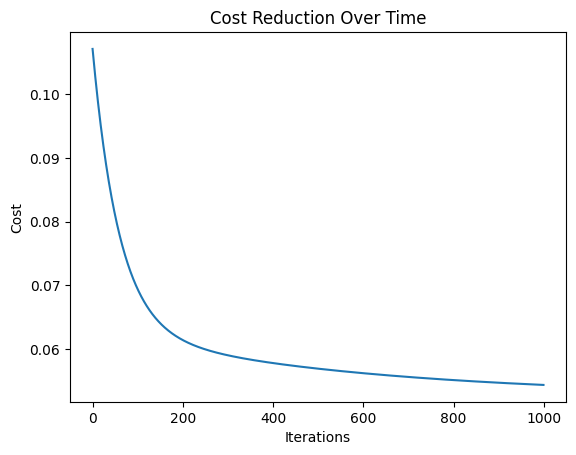

In [16]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Time")
plt.show()

To-Do-11: Findings & Experiments  
Model Performance Analysis

The performance of the linear regression model is acceptable.
The model does not show signs of overfitting because it was trained using a simple linear regression approach without a bias term.
Since no intercept term was included, the model has limited flexibility, but it still learns a reasonable relationship between Math, Reading, and Writing scores.
Overall, the predictions are close to the actual values, indicating that the model fits the data reasonably well.

Learning Rate Experiments

Different learning rate values were tested to observe their effect on model training.

When a high learning rate such as 0.1 was used, the model failed to converge and the cost increased, indicating divergence.
A learning rate of 0.01 resulted in unstable training with fluctuating cost values.
A learning rate of 0.00001 produced stable convergence and a gradual decrease in cost, giving the best performance.
A very small learning rate such as 0.000001 caused the model to converge very slowly.

Based on these experiments, the optimal learning rate for this model is 0.00001.








